### Import potrebných knižníc

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

import pandas as pd
import numpy as np

Using TensorFlow backend.


### Import datasetu

In [2]:
stars_data_raw = pd.read_csv("stars_data.csv")

### Prehľad dát

In [3]:
print("Počet riadkov: ", stars_data_raw.shape[0])
print("Počet stĺpcov: ", stars_data_raw.shape[1])
print("Názvy stĺpcov: ", stars_data_raw.columns)

Počet riadkov:  240
Počet stĺpcov:  7
Názvy stĺpcov:  Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [4]:
print("Prvých 10 riadkov datasetu: \n")
print(stars_data_raw.head(10))
print("Posledných 10 riadkov datasetu: \n")
print(stars_data_raw.tail(10))

Prvých 10 riadkov datasetu: 

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   
5             2840          0.000650        0.1100                   16.98   
6             2637          0.000730        0.1270                   17.22   
7             2600          0.000400        0.0960                   17.40   
8             2650          0.000690        0.1100                   17.45   
9             2700          0.000180        0.1300                   16.05   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red      

## Definovanie vstupných parametrov
##### Stĺpce Luminosity, Radius a Absolute Magnitude ako vstup "train_x" a stĺpec Star type ako očakávaný výstup "train_y"

In [5]:
train_x = stars_data_raw.iloc[:,1:4].values
train_y = stars_data_raw.iloc[:, 4].values
# Prevedenie výstupu na kategorickú premennú
categorical = np_utils.to_categorical(train_y)

### Zadefinovanie prvého modelu
#### 3 vstupné parametre, 3 skryté vrstvy po 50 neurónov a 6 neurónov na výstupe, všetky vrstvy majú aktivačnú funkciu sigmoid

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=3, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(6, activation = 'sigmoid'))

### Kompilácia modelu
#### loss funkcia = mean_squared_error, optimizer = sgd

In [7]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

### Testovanie siete
#### Nasledujúci kód otestuje siet 20 krát
V každom kroku sa sieť vytrénuje a otestuje, všetky výsledné úspešnosti sa uložia a vypíše sa max a min hodnota

In [8]:
hodnoty=[]
# zbehnutie siete 20 krat
# ulozime vysledne skora
for _ in range(20):
    model.fit(train_x, categorical)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)

# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/1
240/240 [==============================] - 0s 993us/step
Epoch 1/1
240/240 [==============================] - 0s 107us/step
Epoch 1/1
240/240 [==============================] - 0s 170us/step
Epoch 1/1
240/240 [==============================] - 0s 148us/step
Epoch 1/1
240/240 [==============================] - 0s 146us/step
Epoch 1/1
240/240 [==============================] - 0s 178us/step
Epoch 1/1
240/240 [==============================] - 0s 149us/step
Epoch 1/1
240/240 [==============================] - 0s 235us/step
Epoch 1/1
240/240 [==============================] - 0s 137us/step
Epoch 1/1
240/240 [==============================] - 0s 178us/step
Epoch 1/1
240/240 [==============================] - 0s 160us/step
Epoch 1/1
240/240 [==============================] - 0s 325us/step
Epoch 1/1
240/240 [==============================] - 0s 169us/step
Epoch 1/1
240/240 [==============================] - 0s 171us/step
Epoch 1/1
240/240 [==============================] - 0s 166us/

Maximálne skóre: 16.67%
Minimálne skóre: 16.67%

Príliš nízke hodnoty

#### 3.5. 2020 Zvýšenie počtu iteracií učenia (atribút epochs v metóde fit)
Znova otestujeme na 20 pokusoch

In [9]:
hodnoty = []

for _ in range(20):
    # pocet epoch nastavime na 5
    model.fit(train_x, categorical, epochs=5)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)

# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
240/240 [==============================] - 0s 248us/step - loss: 0.1916 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 265us/step - loss: 0.1892 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 211us/step - loss: 0.1869 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 300us/step - loss: 0.1848 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 220us/step
Epoch 1/5
240/240 [==============================] - 0s 347us/step - loss: 0.1808 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 262us/step - loss: 0.1789 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 319us/step - loss: 0.1771 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.18 - 0s 192us/step - loss: 0.1755 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 209us/step
Epoch 1/5
240/24

240/240 [==============================] - 0s 257us/step - loss: 0.1425 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 371us/step - loss: 0.1424 - accuracy: 0.2833
Epoch 5/5
240/240 [==============================] - 0s 128us/step
Epoch 1/5
240/240 [==============================] - 0s 262us/step - loss: 0.1422 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 227us/step - loss: 0.1421 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 401us/step - loss: 0.1420 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 253us/step - loss: 0.1419 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 232us/step
Epoch 1/5
240/240 [==============================] - 0s 312us/step - loss: 0.1417 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 228us/step - loss: 0.1416 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 209us/step -

Po zvýšení počtu epoch na 5 sa nám podarilo v niektorých prípadoch zvýšiť úspešnosť siete, avšak nie na dostatočne vysokú hodnotu. Z tohto poznatku nám však vyplýva že zvýšenie počtu epoch nám môže v optimálnej sieti priniesť vyššiu úspešnosť. Výslednú úspešnosť ovplyvňuje aj aktivačná funkcia alebo loss funkcia. V ďalšej časti sa pokúsime zvýšiť počet neúrónov v skrytých vrstvách.

#### 3.5. 2020 Ponechanie predchadzajuceho procesu trenovania so zmenenou strukturou siete
(3 vstupy, 3 skryté vrstvy po 100 neurónoch a 6 výstupov) aktivačnu funkciu nateraz nechávame rovnakú teda sigmoid, rovnako aj atribúty  metódy compile

In [10]:
model2 = Sequential()
model2.add(Dense(100, input_dim=3, activation='sigmoid')) #vstupna vrstva
model2.add(Dense(100, activation='sigmoid')) # skryta vrstva
model2.add(Dense(100, activation='sigmoid')) # skryta vrstva
model2.add(Dense(6, activation = 'sigmoid')) # vystupne neurony
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
hodnoty=[]

for _ in range(50):
    # pocet epoch nastavime na 5
    model2.fit(train_x, categorical, epochs=5)
    scores = model.evaluate(train_x, categorical)
    hodnoty.append(scores[1]*100)
    
# vypisanie maximalneho a minimalneho skora uspesnosti siete
print("Maximálne skóre: {:.2f}%".format(max(hodnoty)))
print("Minimálne skóre: {:.2f}%".format(min(hodnoty)))

Epoch 1/5
240/240 [==============================] - 1s 4ms/step - loss: 0.2734 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 354us/step - loss: 0.2630 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 349us/step - loss: 0.2532 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 459us/step - loss: 0.2440 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 174us/step
Epoch 1/5
240/240 [==============================] - 0s 278us/step - loss: 0.2273 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 203us/step - loss: 0.2197 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 286us/step - loss: 0.2128 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 269us/step - loss: 0.2064 - accuracy: 0.1167
Epoch 5/5
240/240 [==============================] - 0s 171us/step
Epoch 1/5
240/240 [==============================] - 0s 388u

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.363538). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.182291). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


240/240 [==============================] - 0s 131us/step
Epoch 1/5
240/240 [==============================] - 0s 203us/step - loss: 0.1428 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 222us/step - loss: 0.1426 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 383us/step - loss: 0.1424 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 235us/step - loss: 0.1422 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 141us/step
Epoch 1/5
240/240 [==============================] - 0s 235us/step - loss: 0.1419 - accuracy: 0.1667
Epoch 2/5
240/240 [==============================] - 0s 299us/step - loss: 0.1418 - accuracy: 0.1667
Epoch 3/5
240/240 [==============================] - 0s 334us/step - loss: 0.1416 - accuracy: 0.1667
Epoch 4/5
240/240 [==============================] - 0s 209us/step - loss: 0.1415 - accuracy: 0.1667
Epoch 5/5
240/240 [==============================] - 0s 168us/step
E

240/240 [==============================] - 0s 260us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 291us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 111us/step
Epoch 1/5
240/240 [==============================] - 0s 316us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 463us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 303us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 4/5
240/240 [==============================] - 0s 341us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 5/5
240/240 [==============================] - 0s 160us/step
Epoch 1/5
240/240 [==============================] - 0s 281us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 2/5
240/240 [==============================] - 0s 234us/step - loss: 0.1388 - accuracy: 0.3333
Epoch 3/5
240/240 [==============================] - 0s 314us/step -

240/240 [==============================] - 0s 154us/step
Epoch 1/5
240/240 [==============================] - 0s 437us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 2/5
240/240 [==============================] - 0s 236us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 3/5
240/240 [==============================] - 0s 288us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 4/5
240/240 [==============================] - 0s 151us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 5/5
240/240 [==============================] - 0s 185us/step
Epoch 1/5
240/240 [==============================] - 0s 241us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 2/5
240/240 [==============================] - 0s 264us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 3/5
240/240 [==============================] - 0s 390us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 4/5
240/240 [==============================] - 0s 294us/step - loss: 0.1384 - accuracy: 0.3375
Epoch 5/5
240/240 [==============================] - 0s 325us/step
E

Zvýšenie počtu neurónov v skrytých vrstvách nám pomohlo s konzistentnosťou našej siete, pretože sme pravidelnejšie dosahovali maximálnu hodnotu úspešnosti ďalej by bolo dobré sa zamerať na vhodnejšie aktivačné funkcie alebo optimizer a loss funkciu

#### Skúšanie rôznych optimizerov
Použijeme model2 bez zmien vo vrstvách
Použité optimizery: sgd, rmsprop, adam, nadam, adagrad, adadelta, adamax

In [11]:
def do_cycle():
    # pocet epoch nastavime na 5
    history = model2.fit(train_x, categorical, epochs=15)
    scores = model.evaluate(train_x, categorical)
    return history

model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
historysgd = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
historyrmsprop = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
historyadam = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])
historynadam = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])
historyadagrad = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])
historyadadelta = do_cycle()

model2.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])
historyadamax = do_cycle()

Epoch 1/15
240/240 [==============================] - 1s 3ms/step - loss: 0.1382 - accuracy: 0.3375
Epoch 2/15
240/240 [==============================] - 0s 269us/step - loss: 0.1382 - accuracy: 0.3375
Epoch 3/15
240/240 [==============================] - 0s 208us/step - loss: 0.1382 - accuracy: 0.3375
Epoch 4/15
240/240 [==============================] - 0s 232us/step - loss: 0.1382 - accuracy: 0.3458
Epoch 5/15
240/240 [==============================] - 0s 212us/step - loss: 0.1382 - accuracy: 0.3375
Epoch 6/15
240/240 [==============================] - 0s 247us/step - loss: 0.1382 - accuracy: 0.3458
Epoch 7/15
240/240 [==============================] - 0s 161us/step - loss: 0.1382 - accuracy: 0.3417
Epoch 8/15
240/240 [==============================] - 0s 258us/step - loss: 0.1382 - accuracy: 0.3458
Epoch 9/15
240/240 [==============================] - 0s 439us/step - loss: 0.1382 - accuracy: 0.3458
Epoch 10/15
240/240 [==============================] - 0s 200us/step - loss: 0.1382 

240/240 [==============================] - 0s 358us/step - loss: 0.0874 - accuracy: 0.4917
Epoch 4/15
240/240 [==============================] - 0s 483us/step - loss: 0.0872 - accuracy: 0.5083
Epoch 5/15
240/240 [==============================] - 0s 378us/step - loss: 0.0872 - accuracy: 0.4917
Epoch 6/15
240/240 [==============================] - 0s 269us/step - loss: 0.0874 - accuracy: 0.4875
Epoch 7/15
240/240 [==============================] - 0s 389us/step - loss: 0.0872 - accuracy: 0.5000
Epoch 8/15
240/240 [==============================] - 0s 228us/step - loss: 0.0874 - accuracy: 0.5083
Epoch 9/15
240/240 [==============================] - 0s 409us/step - loss: 0.0872 - accuracy: 0.5167
Epoch 10/15
240/240 [==============================] - 0s 520us/step - loss: 0.0872 - accuracy: 0.4792
Epoch 11/15
240/240 [==============================] - 0s 405us/step - loss: 0.0870 - accuracy: 0.5250
Epoch 12/15
240/240 [==============================] - 0s 389us/step - loss: 0.0868 - accur

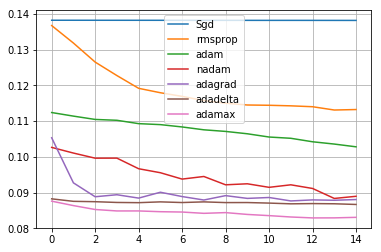

In [40]:
import matplotlib.pyplot as plt

plt.plot(historysgd.history['loss'], label="Sgd")
plt.plot(historyrmsprop.history['loss'], label="rmsprop")
plt.plot(historyadam.history['loss'], label="adam")
plt.plot(historynadam.history['loss'], label="nadam")
plt.plot(historyadagrad.history['loss'], label="adagrad")
plt.plot(historyadadelta.history['loss'], label="adadelta")
plt.plot(historyadamax.history['loss'], label="adamax")
plt.grid()
plt.legend()

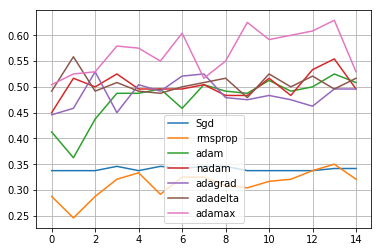

In [41]:
plt.plot(historysgd.history['accuracy'], label="Sgd")
plt.plot(historyrmsprop.history['accuracy'], label="rmsprop")
plt.plot(historyadam.history['accuracy'], label="adam")
plt.plot(historynadam.history['accuracy'], label="nadam")
plt.plot(historyadagrad.history['accuracy'], label="adagrad")
plt.plot(historyadadelta.history['accuracy'], label="adadelta")
plt.plot(historyadamax.history['accuracy'], label="adamax")
plt.grid()
plt.legend()

#### 6.5.2020 Vizualizácia optimizerov
##### Na vyššie uvedených grafoch vidíme že ako najlepší optimizer sa javí adamax, nahradili sme ním optimizer adam, ktorý sme používali v našej výslednej sieti

## 5.5. 2020 Uprava datasetu, prehodnotenie vstupnych parametrov X a y
Hviezdy vieme klasifikovat na základe parametrov Luminosity(1), Spectral class(6), Magnitude(3) a Temperature(0).
Môzeme si dopomôct aj parametrom Star color(5), ktorý však máme definovaný ako string a je potrebné ho prekonvertovat na numerickú hodnotu.
Rovnako budeme musieť prekonvertovať aj parameter Spectral class

Konvertovanie stĺpcu Star color

In [14]:
stars_dict = {}
i = 0
for _, row in stars_data_raw['Star color'].iteritems():
    farba = row.lower().replace(" ", "").replace("-", "")
    if farba not in stars_dict.keys():
        stars_dict[farba] = i
        i = i+1

for i, row in stars_data_raw['Star color'].iteritems():
    farba = row.lower().replace(" ", "").replace("-", "")
    stars_data_raw.at[i, 'Star color'] = stars_dict[farba]

Konvertovanie stĺpcu Spectral class

In [15]:
spectral_dict = {}
i = 0
for _, c in stars_data_raw['Spectral Class'].iteritems():
    if c not in spectral_dict.keys():
        spectral_dict[c] = i
        i = i+1
for i, row in stars_data_raw['Spectral Class'].iteritems():
    stars_data_raw.at[i, 'Spectral Class'] = spectral_dict[row] 

In [16]:
X = stars_data_raw.iloc[:,[0,1,3,5,6]].values
y = stars_data_raw.iloc[:, 4].values
categorical_y = np_utils.to_categorical(y)

### Dáta sme nerozdelili na trénovacie a testovacie z dôvodu nízkeho počtu riadkov v datasete (240)

Náš nový model obsahuje 5 vstupných neurónov, 3 skryté vrstvy po 100 neurónov s aktivačnou funkciou relu (vhodná pre klasifikáciu) a 6 výstupných neurónov (podľa kategorickej premennej) s aktivačnou funkciou softmax

In [17]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=5, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(units=6, activation='softmax'))

Použili sme optimizer adam a loss funkciu categorical_crossentropy, ktorá je vhodná pri použití to_categorical na výstupných dátach

Model trénujeme na 150 iteráciách a testujeme na celom datasete (z dôvodu nízkeho počtu dostupných dát)


### 6.5.2020 Po preskúšaní rôznych optimizerov sme sa rozhodli pre optimizer adamax, zamenili sme ho za optimizer adam

In [29]:
nn_model.compile(optimizer="adamax", loss='categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X, categorical_y, epochs=150, validation_split=0.20)
nn_scores = nn_model.evaluate(X, categorical_y)

Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 1s 5ms/step - loss: 233.0331 - accuracy: 0.3802 - val_loss: 400.4321 - val_accuracy: 0.4792
Epoch 2/150
192/192 [==============================] - 0s 396us/step - loss: 136.0507 - accuracy: 0.3490 - val_loss: 329.0339 - val_accuracy: 0.6875
Epoch 3/150
192/192 [==============================] - 0s 362us/step - loss: 83.4688 - accuracy: 0.5208 - val_loss: 250.9542 - val_accuracy: 0.5208
Epoch 4/150
192/192 [==============================] - 0s 647us/step - loss: 56.1831 - accuracy: 0.5885 - val_loss: 163.0130 - val_accuracy: 0.5625
Epoch 5/150
192/192 [==============================] - 0s 351us/step - loss: 44.5977 - accuracy: 0.6250 - val_loss: 143.8510 - val_accuracy: 0.4583
Epoch 6/150
192/192 [==============================] - 0s 458us/step - loss: 33.6718 - accuracy: 0.4896 - val_loss: 138.6541 - val_accuracy: 0.5208
Epoch 7/150
192/192 [==============================] - 0s 374us/ste

192/192 [==============================] - 0s 352us/step - loss: 16.0098 - accuracy: 0.7500 - val_loss: 100.6992 - val_accuracy: 0.5833
Epoch 57/150
192/192 [==============================] - 0s 271us/step - loss: 27.3865 - accuracy: 0.7188 - val_loss: 38.7071 - val_accuracy: 0.7708
Epoch 58/150
192/192 [==============================] - 0s 310us/step - loss: 14.8535 - accuracy: 0.7552 - val_loss: 59.6554 - val_accuracy: 0.6667
Epoch 59/150
192/192 [==============================] - 0s 301us/step - loss: 17.2279 - accuracy: 0.7083 - val_loss: 59.7917 - val_accuracy: 0.5833
Epoch 60/150
192/192 [==============================] - 0s 416us/step - loss: 9.9693 - accuracy: 0.7656 - val_loss: 41.7819 - val_accuracy: 0.6667
Epoch 61/150
192/192 [==============================] - 0s 287us/step - loss: 12.4785 - accuracy: 0.7812 - val_loss: 57.2718 - val_accuracy: 0.7083
Epoch 62/150
192/192 [==============================] - 0s 260us/step - loss: 10.0675 - accuracy: 0.8073 - val_loss: 40.9778 

192/192 [==============================] - 0s 683us/step - loss: 18.9714 - accuracy: 0.6146 - val_loss: 79.8211 - val_accuracy: 0.7083
Epoch 112/150
192/192 [==============================] - 0s 372us/step - loss: 24.5720 - accuracy: 0.5625 - val_loss: 62.4171 - val_accuracy: 0.5417
Epoch 113/150
192/192 [==============================] - 0s 348us/step - loss: 31.8239 - accuracy: 0.5938 - val_loss: 45.1188 - val_accuracy: 0.7083
Epoch 114/150
192/192 [==============================] - 0s 302us/step - loss: 32.9161 - accuracy: 0.6198 - val_loss: 62.1798 - val_accuracy: 0.5625
Epoch 115/150
192/192 [==============================] - 0s 392us/step - loss: 35.3888 - accuracy: 0.6302 - val_loss: 55.7098 - val_accuracy: 0.7917
Epoch 116/150
192/192 [==============================] - 0s 307us/step - loss: 18.7430 - accuracy: 0.6927 - val_loss: 49.7059 - val_accuracy: 0.5833
Epoch 117/150
192/192 [==============================] - 0s 372us/step - loss: 14.1179 - accuracy: 0.7500 - val_loss: 25

In [38]:
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(nn_scores[1]*100))

Výsledné skóre testovania neurónovej sieťe: 79.58% 


# Vizualizácia

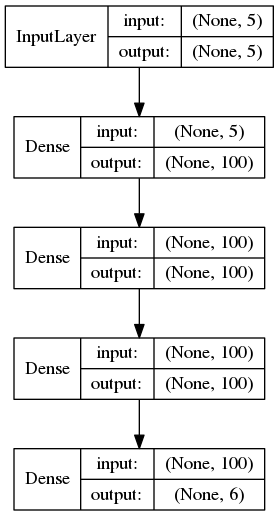

In [31]:
from keras.utils import plot_model
plot_model(nn_model, to_file='nn_model.png', show_shapes=True, show_layer_names=False, expand_nested=False)

In [32]:
import matplotlib.pyplot as plt

In [33]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

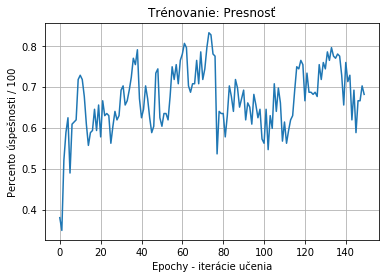

In [34]:
plt.plot(history.history['accuracy'])
plt.title("Trénovanie: Presnosť")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

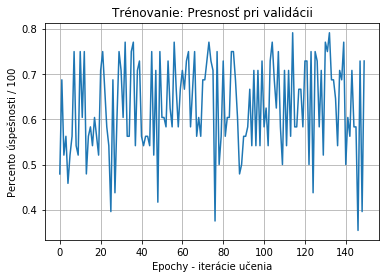

In [35]:
plt.plot(history.history['val_accuracy'])
plt.title("Trénovanie: Presnosť pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

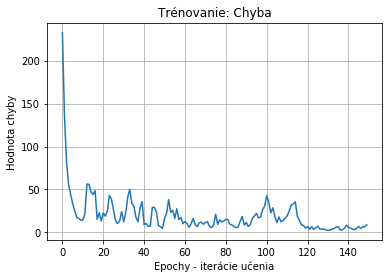

In [36]:
plt.plot(history.history['loss'])
plt.title("Trénovanie: Chyba")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()

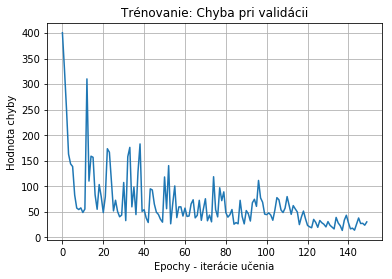

In [37]:
plt.plot(history.history['val_loss'])
plt.title("Trénovanie: Chyba pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()